# Отбор признаков
Продемонстрируем работу методов отбора признаков на примере предсказания зарплаты клиента. Считаем данные и посмотрим на их содержание.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("train_sample.xlsx")

In [3]:
data.head()

,ID клиента,Сумма входящих переводов по картам,Сумма всех приходных операций,Сумма снятий наличных в банкоматах,Сумма трат в категории Кафе/Рестораны,Сумма среднего ежемесячного платежа по кредитам,Сумма основного долга по ипотеке,Сумма основной долга по потребительским кредитам,Сумма соц начислений,Суммарный баланс по всем счетам,...,Целевая. Логарифм дохода клиента,Логарифм. Сумма входящих переводов по картам,Логарифм. Сумма снятий наличных в банкоматах,Логарифм. Сумма трат в категории Кафе/Рестораны,Логарифм. Средний ежемесячный платеж по кредитам,Логарифм. Основной долг по ипотеке,Логарифм. Основной долг по потребительским кредитам,Логарифм. Сумма соц начислений,Логарифм. Суммарный баланс по всем счетам,Логарифм. P&L клиента
0,190,12.164560,16.864055,6.500000,0.000000,0.0,0.0,128.26156,11.59789,1.908402,...,3.718674,2.882791,2.014903,0.000000,0.0,0.0,4.861838,2.533529,1.067604,4.599880
1,235,4.531163,12.950163,8.650000,0.045000,0.0,0.0,0.00000,0.00000,2.167082,...,3.664629,2.635491,2.266958,0.044017,0.0,0.0,0.000000,0.000000,1.152811,4.605205
2,305,9.174175,61.867825,7.583333,1.817638,0.0,0.0,0.00000,9.17418,1.367232,...,4.201151,4.141035,2.149822,1.035899,0.0,0.0,0.000000,2.319853,0.861721,4.605217
3,313,2.756995,30.078990,5.350000,0.068000,0.0,0.0,0.00000,2.75700,4.509525,...,4.456009,3.436532,1.848455,0.065788,0.0,0.0,0.000000,1.323621,1.706478,4.607315
4,510,31.666667,43.033333,1.333333,0.000000,0.0,0.0,0.00000,0.00000,316.015913,...,3.859898,3.784947,0.847298,0.000000,0.0,0.0,0.000000,0.000000,5.758952,4.627987


In [4]:
data.columns

Index(['ID клиента', 'Сумма входящих переводов по картам',
       'Сумма всех приходных операций', 'Сумма снятий наличных в банкоматах',
       'Сумма трат в категории Кафе/Рестораны',
       'Сумма среднего ежемесячного платежа по кредитам',
       'Сумма основного долга по ипотеке',
       'Сумма основной долга по потребительским кредитам',
       'Сумма соц начислений', 'Суммарный баланс по всем счетам',
       'Сумма P&L клиента', 'Атрибут. Возраст', 'Атрибут. Пол',
       'Атрибут. Тип населенного пункта: города-миллионеры',
       'Атрибут. Тип населенного пункта: остальные города',
       'Атрибут. Гражданин РФ', 'Атрибут. Сотрудник Сбербанка',
       'Атрибут. Сегмент ВИП',
       'Атрибут. Сегмент МВС (массовый высокодоходный)',
       'Атрибут. Социальный сегмент', 'Атрибут. Массовый сегмент',
       'Атрибут. Активный мобильный банк', 'Атрибут. Наличие Пакета Услуга',
       'Атрибут. Уровень утилизации кредитной карты',
       'Атрибут. Подключенная программа лояльности Спа

Удалим пропуски в данных, выделим целевую переменную и разобьём данные на train и test

In [5]:
data.dropna(inplace=True)

In [6]:
y = data['Целевая. Логарифм дохода клиента'].values

In [7]:
X = data.drop(columns=['Целевая. Логарифм дохода клиента', 'Целевая. Доход клиента'])

In [8]:
X['Логарифм. Сумма всех приходных операций'] = np.log(X['Сумма всех приходных операций'] + 1)

In [9]:
X.drop(columns=['Атрибут. Сегмент ВИП'], inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Матрица корреляций. Видим, что есть множество корреляций, поскольку изначально данные дублируются. Выделим колонки с логарифмами признаков.

In [12]:
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)

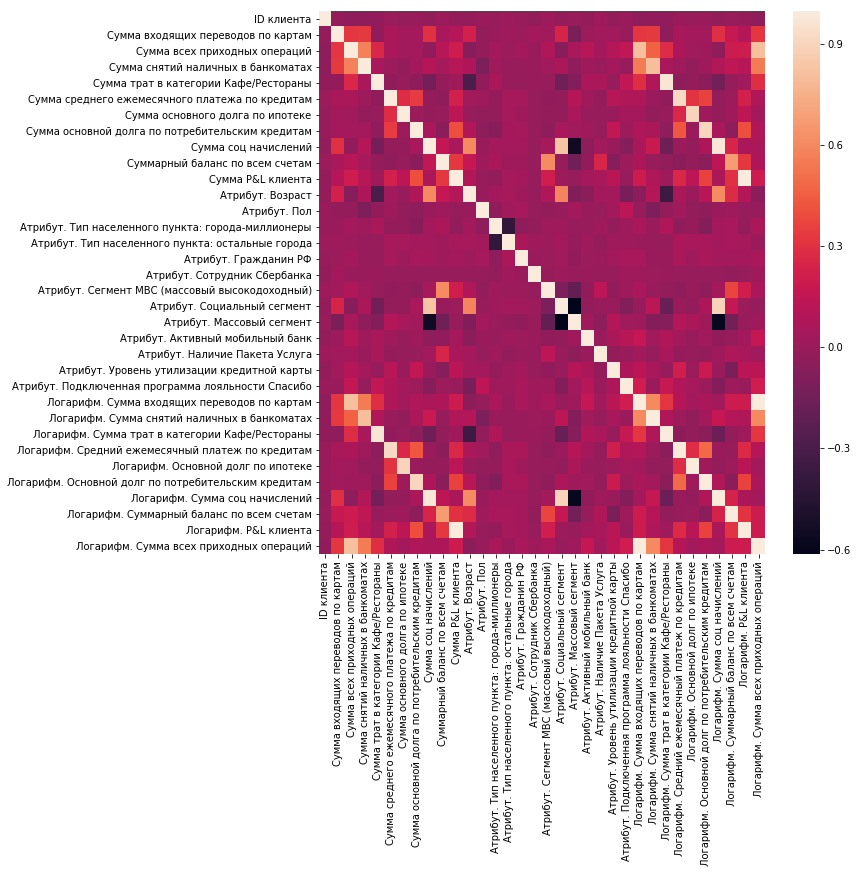

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), xticklabels=1, yticklabels=1)

In [15]:
basic_columns = X.columns[:-10].values
log_columns = ['ID клиента',
               'Сумма всех приходных операций',
               'Атрибут. Возраст', 
               'Атрибут. Пол',
               'Атрибут. Тип населенного пункта: города-миллионеры',
               'Атрибут. Тип населенного пункта: остальные города',
               'Атрибут. Гражданин РФ', 'Атрибут. Сотрудник Сбербанка',
               'Атрибут. Сегмент МВС (массовый высокодоходный)',
               'Атрибут. Социальный сегмент', 'Атрибут. Массовый сегмент',
               'Атрибут. Активный мобильный банк', 'Атрибут. Наличие Пакета Услуга',
               'Атрибут. Уровень утилизации кредитной карты',
               'Атрибут. Подключенная программа лояльности Спасибо',
               'Логарифм. Сумма входящих переводов по картам',
               'Логарифм. Сумма снятий наличных в банкоматах',
               'Логарифм. Сумма трат в категории Кафе/Рестораны',
               'Логарифм. Средний ежемесячный платеж по кредитам',
               'Логарифм. Основной долг по ипотеке',
               'Логарифм. Основной долг по потребительским кредитам',
               'Логарифм. Сумма соц начислений',
               'Логарифм. Суммарный баланс по всем счетам', 
               'Логарифм. P&L клиента',
               'Логарифм. Сумма всех приходных операций']

Обучим два бейзлайна: Ridge-регрессию и случайный лес. Измерим качество и визуализируем коэффициенты признаков.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [17]:
cross_val_score(Ridge(), X=X_train[log_columns], y=y_train, cv=5, scoring='r2').mean(), \
cross_val_score(Ridge(), X=X_train, y=y_train, cv=5, scoring='r2').mean()

(0.5143881623729566, 0.5145170169307652)

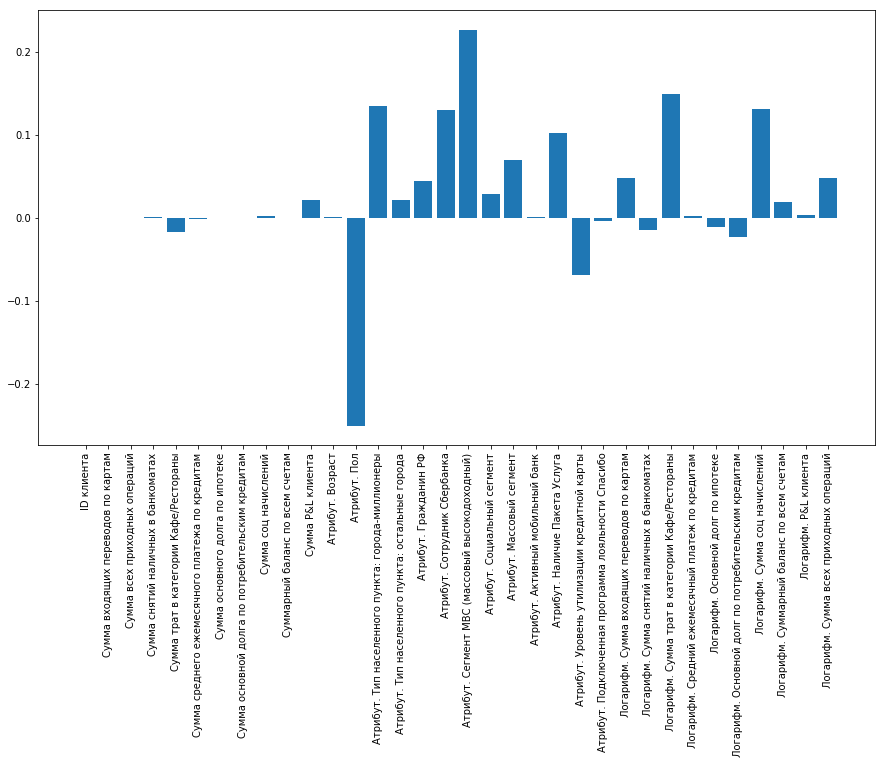

In [18]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
plt.figure(figsize=(15,8))
plt.bar(X_train.columns, ridge_model.coef_)
plt.xticks(rotation=90)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
cross_val_score(RandomForestRegressor(n_estimators=100), X=X_train[log_columns], y=y_train, cv=5, scoring='r2').mean(), \
cross_val_score(RandomForestRegressor(n_estimators=100), X=X_train, y=y_train, cv=5, scoring='r2').mean()

(0.4695612037479754, 0.4702750000971488)

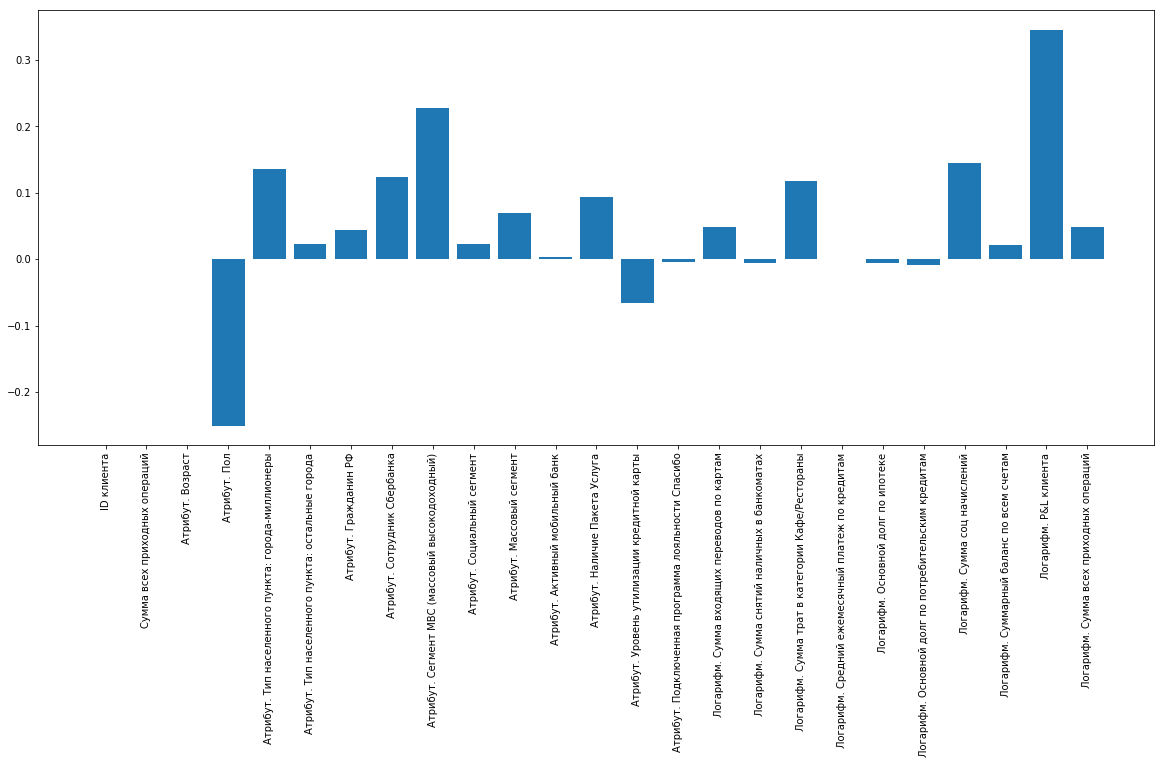

In [21]:
model = Ridge().fit(X_train[log_columns], y_train)
plt.figure(figsize=(20, 8))
plt.bar(log_columns, model.coef_)
plt.xticks(rotation=90)
plt.show()

In [22]:
list(zip(model.coef_, log_columns))

[(-1.4230529900807432e-08, 'ID клиента'),
 (7.507198863381762e-05, 'Сумма всех приходных операций'),
 (0.0008957497598681053, 'Атрибут. Возраст'),
 (-0.2503936010793978, 'Атрибут. Пол'),
 (0.13558669953145738, 'Атрибут. Тип населенного пункта: города-миллионеры'),
 (0.02248100938203352, 'Атрибут. Тип населенного пункта: остальные города'),
 (0.04385906131606431, 'Атрибут. Гражданин РФ'),
 (0.12389775268216732, 'Атрибут. Сотрудник Сбербанка'),
 (0.2272955784417533, 'Атрибут. Сегмент МВС (массовый высокодоходный)'),
 (0.023172566230419328, 'Атрибут. Социальный сегмент'),
 (0.06919643086895808, 'Атрибут. Массовый сегмент'),
 (0.002992753289555601, 'Атрибут. Активный мобильный банк'),
 (0.09324674364272416, 'Атрибут. Наличие Пакета Услуга'),
 (-0.06599566077414563, 'Атрибут. Уровень утилизации кредитной карты'),
 (-0.004548084890005203, 'Атрибут. Подключенная программа лояльности Спасибо'),
 (0.04802381666319908, 'Логарифм. Сумма входящих переводов по картам'),
 (-0.006184519891327575, 'Ло

## Модели на основе статистического анализа
Sklearn содержит в себе множество статистических тестов для определения важности признаков.

* Для задачи регрессии: f_regression, mutual_info_regression
* Для задачи классификации: chi2, f_classif, mutual_info_classif

Воспользуемся методом mutual_info_regression.

In [23]:
from sklearn.feature_selection import mutual_info_regression

mutual_information = mutual_info_regression(X_train[log_columns], y_train)

In [24]:
mutual_information

array([7.66301946e-03, 8.18271079e-02, 5.40140753e-02, 7.86317007e-02,
       1.83435567e-02, 1.35245460e-02, 1.99831915e-05, 0.00000000e+00,
       1.78860671e-02, 7.81470286e-02, 3.82236605e-02, 0.00000000e+00,
       2.59989772e-03, 0.00000000e+00, 0.00000000e+00, 8.35893123e-02,
       5.04876141e-02, 6.89396999e-04, 2.02592325e-03, 2.92422537e-03,
       1.58984101e-03, 1.30116521e-01, 4.00309479e-02, 3.20676400e-02,
       8.36251847e-02])

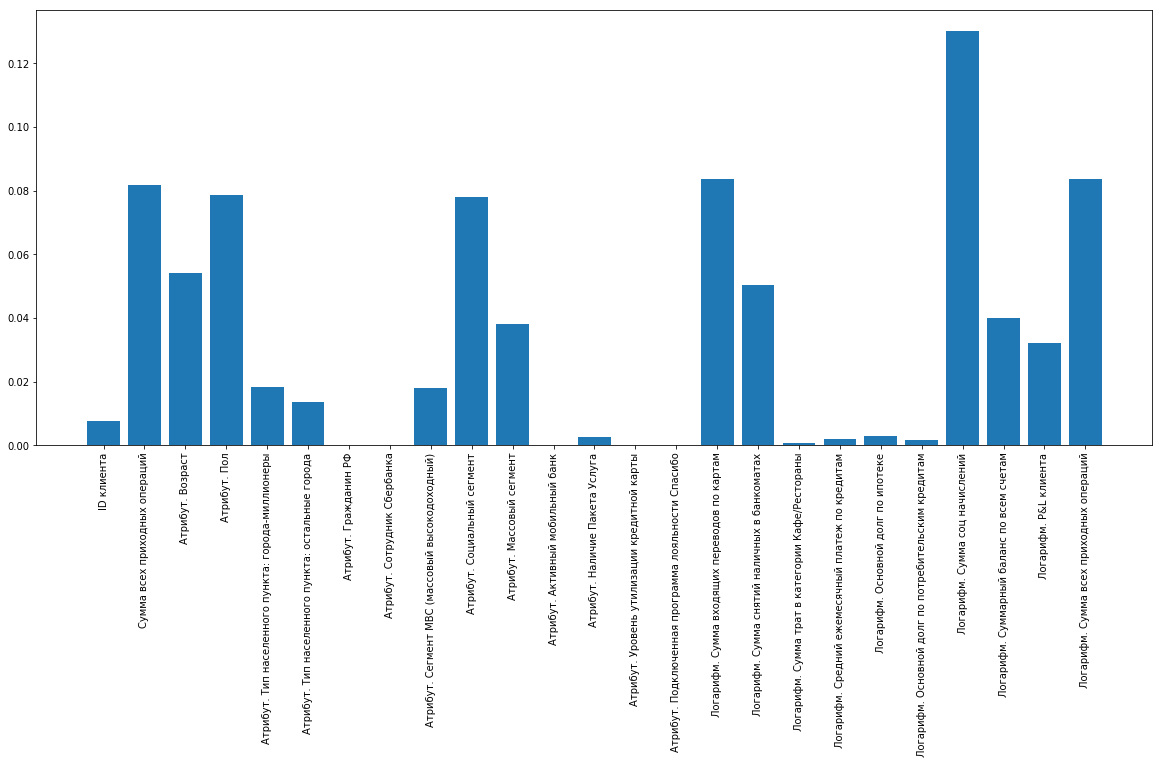

In [25]:
plt.figure(figsize=(20, 8))
plt.bar(log_columns, mutual_information)
plt.xticks(rotation=90)
plt.show()

In [54]:
from sklearn.feature_selection import GenericUnivariateSelect

In [55]:
trans = GenericUnivariateSelect(score_func=mutual_info_regression, mode='percentile', param=50)
X_trans = trans.fit_transform(X_train[log_columns], y_train)

In [56]:
columns_retained_Select = np.array(log_columns)[trans.get_support()]
X_trans = pd.DataFrame(X_trans, columns=columns_retained_Select)
X_trans.head()

,Сумма всех приходных операций,Атрибут. Возраст,Атрибут. Пол,Атрибут. Тип населенного пункта: города-миллионеры,Атрибут. Социальный сегмент,Атрибут. Массовый сегмент,Логарифм. Сумма входящих переводов по картам,Логарифм. Сумма снятий наличных в банкоматах,Логарифм. Сумма соц начислений,Логарифм. Суммарный баланс по всем счетам,Логарифм. P&L клиента,Логарифм. Сумма всех приходных операций
0,38.612042,25.591,0.0,0.0,0.0,0.0,3.679133,3.029328,0.0,1.277726,4.607701,3.679133
1,14.394760,30.782,1.0,0.0,0.0,1.0,2.734027,1.343735,0.0,5.743084,4.614047,2.734027
2,11.761667,20.347,0.0,0.0,0.0,0.0,2.546446,1.442990,0.0,0.715197,4.605302,2.546446
3,31.709333,29.328,0.0,0.0,0.0,1.0,3.487660,3.034953,0.0,1.628672,4.606212,3.487660
4,15.716265,45.618,1.0,0.0,0.0,1.0,2.816382,1.271631,0.0,1.562343,4.619328,2.816382


In [57]:
cross_val_score(Ridge(), X=X_trans, y=y_train, cv=5, scoring='r2').mean(),\
cross_val_score(RandomForestRegressor(n_estimators=100), 
                X=X_trans, y=y_train, cv=5, scoring='r2').mean()

(0.49512464615324703, 0.45836129079975524)

Sklearn также поддерживает возможность выбрать признаки исходя из их важности в моделях.

In [58]:
from sklearn.feature_selection import SelectFromModel

model = RandomForestRegressor()
trans = SelectFromModel(model, threshold='median')
X_trans = trans.fit_transform(X_train[log_columns], y_train)

columns_retained_Select = np.array(log_columns)[trans.get_support()]
X_trans = pd.DataFrame(X_trans, columns=columns_retained_Select)
X_trans.head()

/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,ID клиента,Сумма всех приходных операций,Атрибут. Возраст,Атрибут. Пол,Атрибут. Тип населенного пункта: города-миллионеры,Атрибут. Уровень утилизации кредитной карты,Логарифм. Сумма входящих переводов по картам,Логарифм. Сумма снятий наличных в банкоматах,Логарифм. Сумма трат в категории Кафе/Рестораны,Логарифм. Сумма соц начислений,Логарифм. Суммарный баланс по всем счетам,Логарифм. P&L клиента,Логарифм. Сумма всех приходных операций
0,126250.0,38.612042,25.591,0.0,0.0,0.0,3.679133,3.029328,0.071545,0.0,1.277726,4.607701,3.679133
1,123536.0,14.394760,30.782,1.0,0.0,0.0,2.734027,1.343735,0.000000,0.0,5.743084,4.614047,2.734027
2,179358.0,11.761667,20.347,0.0,0.0,0.0,2.546446,1.442990,0.865434,0.0,0.715197,4.605302,2.546446
3,99600.0,31.709333,29.328,0.0,0.0,0.0,3.487660,3.034953,0.195841,0.0,1.628672,4.606212,3.487660
4,471410.0,15.716265,45.618,1.0,0.0,0.0,2.816382,1.271631,0.094552,0.0,1.562343,4.619328,2.816382


In [59]:
cross_val_score(Ridge(), X=X_trans, y=y_train, cv=5, scoring='r2').mean()

0.5018433156638336

In [60]:
print(len(X_trans), len(y_train))

3991 3991


Рекурсивный поиск важных признаков позволяет выбрать признаки, которые дают наилучшее качество. В стандартном (не рекурсивном) варианте можно фиксировать количество желаемых признаков.

In [61]:
from sklearn.feature_selection import RFECV

clf = Ridge()
trans = RFECV(clf)
X_trans = trans.fit_transform(X_train[log_columns], y_train)
columns_retained_Select = np.array(log_columns)[trans.get_support()]

X_trans = pd.DataFrame(X_trans, columns=columns_retained_Select)
X_trans.head()

/Users/anastasiazuhba/anaconda3/envs/Py3ML/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,Атрибут. Пол,Атрибут. Тип населенного пункта: города-миллионеры,Атрибут. Тип населенного пункта: остальные города,Атрибут. Гражданин РФ,Атрибут. Сотрудник Сбербанка,Атрибут. Сегмент МВС (массовый высокодоходный),Атрибут. Социальный сегмент,Атрибут. Массовый сегмент,Атрибут. Наличие Пакета Услуга,Атрибут. Уровень утилизации кредитной карты,Атрибут. Подключенная программа лояльности Спасибо,Логарифм. Сумма входящих переводов по картам,Логарифм. Сумма снятий наличных в банкоматах,Логарифм. Сумма трат в категории Кафе/Рестораны,Логарифм. Основной долг по ипотеке,Логарифм. Основной долг по потребительским кредитам,Логарифм. Сумма соц начислений,Логарифм. Суммарный баланс по всем счетам,Логарифм. P&L клиента,Логарифм. Сумма всех приходных операций
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.679133,3.029328,0.071545,0.0,0.000000,0.0,1.277726,4.607701,3.679133
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.734027,1.343735,0.000000,0.0,0.000000,0.0,5.743084,4.614047,2.734027
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.546446,1.442990,0.865434,0.0,0.000000,0.0,0.715197,4.605302,2.546446
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.487660,3.034953,0.195841,0.0,0.000000,0.0,1.628672,4.606212,3.487660
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.816382,1.271631,0.094552,0.0,5.067587,0.0,1.562343,4.619328,2.816382


In [62]:
cross_val_score(Ridge(), X=X_trans, y=y_train, cv=5, scoring='r2').mean()

0.5160201718161425

In [63]:
columns_retained_Select.shape, len(log_columns)

((20,), 25)

In [64]:
from sklearn.feature_selection import RFE

clf = Ridge()
trans = RFE(clf, n_features_to_select=13)
X_trans = trans.fit_transform(X_train[log_columns], y_train)
columns_retained_Select = np.array(log_columns)[trans.get_support()]

X_trans = pd.DataFrame(X_trans, columns=columns_retained_Select)
X_trans.head()

,Атрибут. Пол,Атрибут. Тип населенного пункта: города-миллионеры,Атрибут. Гражданин РФ,Атрибут. Сотрудник Сбербанка,Атрибут. Сегмент МВС (массовый высокодоходный),Атрибут. Массовый сегмент,Атрибут. Наличие Пакета Услуга,Атрибут. Уровень утилизации кредитной карты,Логарифм. Сумма входящих переводов по картам,Логарифм. Сумма трат в категории Кафе/Рестораны,Логарифм. Сумма соц начислений,Логарифм. P&L клиента,Логарифм. Сумма всех приходных операций
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.679133,0.071545,0.0,4.607701,3.679133
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.734027,0.000000,0.0,4.614047,2.734027
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.546446,0.865434,0.0,4.605302,2.546446
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.487660,0.195841,0.0,4.606212,3.487660
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.816382,0.094552,0.0,4.619328,2.816382


In [65]:
cross_val_score(Ridge(), X=X_trans, y=y_train, cv=5, scoring='r2').mean()

0.5061513618536123

In [66]:
print(len(X_trans), len(y_train))

3991 3991


In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=24)

clf = Ridge()
X_trans=pca.fit_transform(X_train)
print(len(X_trans), len(y_train))

3991 3991


In [71]:
cross_val_score(Ridge(), X=X_trans, y=y_train, cv=5, scoring='r2').mean()

0.5012963460887312